<a href="https://colab.research.google.com/github/codfury/codfury-Insurance-premium-charges-prediction/blob/main/191010245_MLA_CourseProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from collections import defaultdict

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/4th Sem Assignments/insurance.csv")

#  Model-1


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
y = data.charges
x= data.drop(['charges','region','sex','smoker'], axis=1)

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
x.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


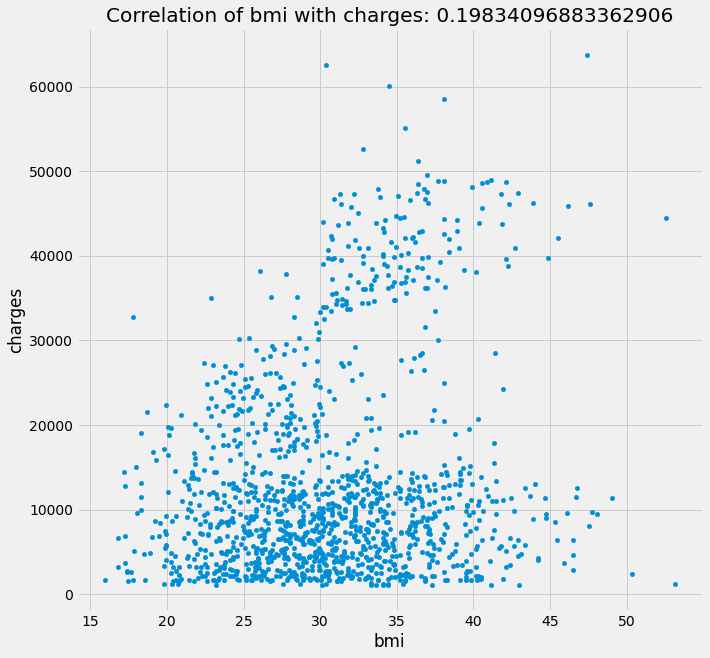

In [ ]:
data.plot.scatter('bmi','charges',figsize=(10,10))
correlation = data.corr()['charges']['bmi']
plt.title('Correlation of bmi with charges: '+str(correlation))
plt.show();

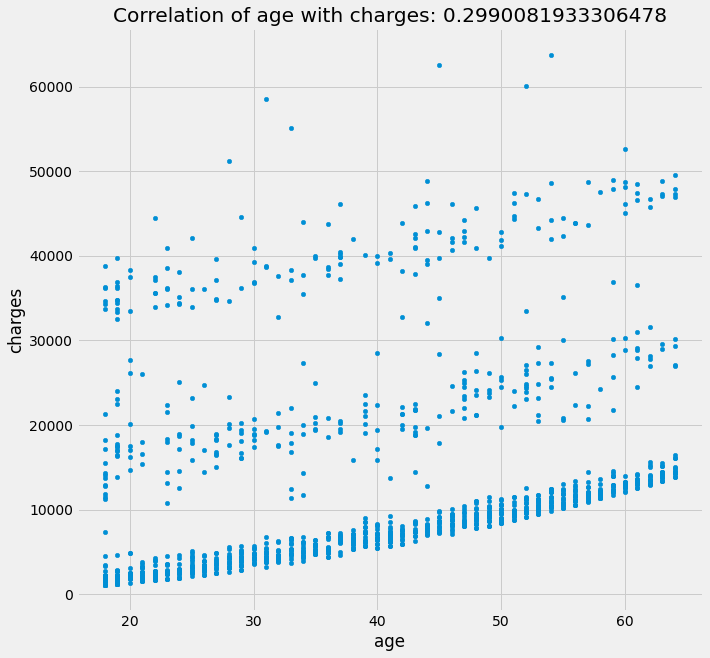

In [ ]:
data.plot.scatter('age','charges',figsize=(10,10))
correlation = data.corr()['charges']['age']
plt.title('Correlation of age with charges: '+str(correlation))
plt.show();

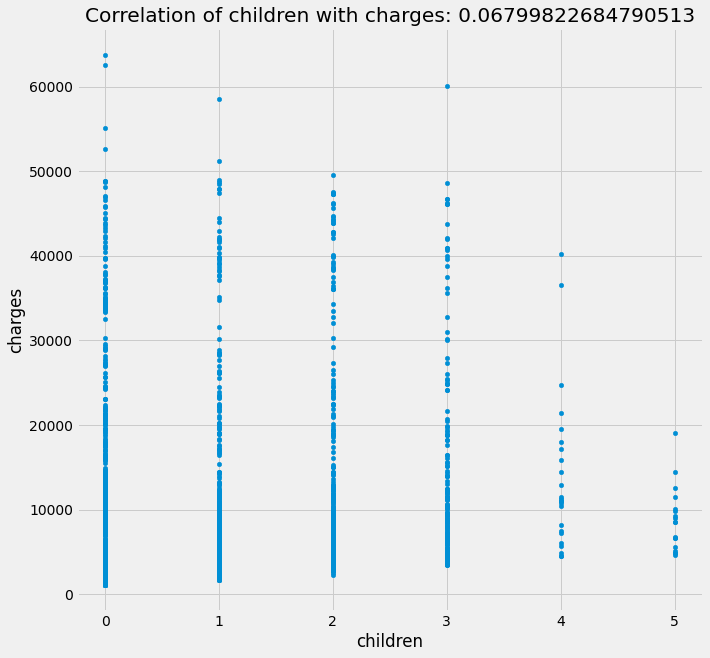

In [ ]:
data.plot.scatter('children','charges',figsize=(10,10))
correlation =data.corr()['charges']['children']
plt.title('Correlation of children with charges: '+str(correlation))
plt.show();

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.50, random_state=7)

In [ ]:
from sklearn import linear_model

In [ ]:
lregr = linear_model.LinearRegression()
lregr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred= lregr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(mean_absolute_error(y_pred,y_test))

9174.041380473298


In [ ]:
print(r2_score(y_test,y_pred))

0.11074213095594865


In [ ]:
#training_error
training_error = mean_squared_error(y_train,y_pred)
print(training_error)

153621619.94059482


In [ ]:
#testing_error
testing_error = mean_squared_error(y_test,y_pred)
print(testing_error)

134850779.35865146


In [ ]:
rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))

In [ ]:
print(rmse)

12394.418902901209


In [ ]:
print(mean_squared_error(y_test,y_pred))

134850779.35865146


In [ ]:
print(lregr.score(x_test,y_test))

0.11074213095594863


In [ ]:
from scipy.stats import ttest_ind
print('P_value :',ttest_ind(y_test,y_pred).pvalue)

P_value : 0.7093001608255907


In [ ]:
import statsmodels.api as sm
from scipy import stats

xt = sm.add_constant(x_test)
est = sm.OLS(y_test.astype(float), xt.astype(float))

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     28.13
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           3.94e-17
Time:                        01:21:32   Log-Likelihood:                -7210.3
No. Observations:                 669   AIC:                         1.443e+04
Df Residuals:                     665   BIC:                         1.445e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6217.7712   2605.865     -2.386      0.0

In [ ]:
print("R-squared adj =",est2.rsquared_adj)

R-squared adj = 0.10859257346223039


In [ ]:
y_test.shape

(669,)

# MODEL-2

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
md2 = data

In [ ]:
md2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
md2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(md2.sex.drop_duplicates())
md2.sex = label.transform(md2.sex)
label.fit(md2.smoker.drop_duplicates())
md2.smoker = label.transform(md2.smoker)
label.fit(md2.region.drop_duplicates())
md2.region = label.transform(md2.region)
md2.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [ ]:
x2=md2.drop('charges',axis=1)
y2=md2[['charges']]

In [ ]:
x2.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
xd = x2.iloc[:,0:6]  
yd = y2.iloc[:,-1]    
yd = np.array((yd),int)
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xd.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(6,'Score')) 

   Features        Score
0       age  6703.764216
3  children  1752.136519
2       bmi  1592.481991
4    smoker  1059.116788
5    region  1044.517751
1       sex   655.072485


In [ ]:
x2_train,x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.5, random_state=7)

In [ ]:
lregr = linear_model.LinearRegression()
lregr.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y2_pred= lregr.predict(x2_test)

In [ ]:
print(mean_absolute_error(y2_pred,y2_test))

4296.496189058798


In [ ]:
print(r2_score(y2_test,y2_pred))


0.757832354733451


In [ ]:
print(mean_squared_error(y2_test,y2_pred))

36723313.71635673


In [ ]:
print(lregr.score(x2_test,y2_test))

0.757832354733451


In [ ]:
#training_error
training_error = mean_squared_error(y2_train,y2_pred)
print(training_error)

228247821.86946908


In [ ]:
#testing_error
testing_error = mean_squared_error(y2_test,y2_pred)
print(testing_error)

36723313.71635673


In [ ]:
rmse = (np.sqrt(mean_squared_error(y2_train, y2_pred)))
print(rmse)

15107.872843966787


In [ ]:

xt = sm.add_constant(x2_test)
est = sm.OLS(y2_test.astype(float), xt.astype(float))

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     368.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          2.98e-207
Time:                        05:28:44   Log-Likelihood:                -6759.2
No. Observations:                 669   AIC:                         1.353e+04
Df Residuals:                     662   BIC:                         1.356e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+04   1351.591     -7.847      0.0

In [ ]:
print("R-squared adj =",est2.rsquared_adj)

R-squared adj = 0.767550470866635


In [ ]:
print('P_value :',ttest_ind(y2_test,y2_pred).pvalue)

P_value : [0.48730536]


# Model-3

In [ ]:
x3=x2
x3

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y3=y2
y3

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
from sklearn import preprocessing
y3 = preprocessing.scale(y3)
# Standardize all column
x3 = preprocessing.scale(x3)
x3 = np.c_[np.ones(x.shape[0]), x3]


In [ ]:
x3

array([[ 1.        , -1.43876426, -1.0105187 , ..., -0.90861367,
         1.97058663,  1.34390459],
       [ 1.        , -1.50996545,  0.98959079, ..., -0.07876719,
        -0.5074631 ,  0.43849455],
       [ 1.        , -0.79795355,  0.98959079, ...,  1.58092576,
        -0.5074631 ,  0.43849455],
       ...,
       [ 1.        , -1.50996545, -1.0105187 , ..., -0.90861367,
        -0.5074631 ,  0.43849455],
       [ 1.        , -1.29636188, -1.0105187 , ..., -0.90861367,
        -0.5074631 ,  1.34390459],
       [ 1.        ,  1.55168573, -1.0105187 , ..., -0.90861367,
         1.97058663, -0.46691549]])

In [ ]:
y3

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [ ]:
x3.shape, y3.shape

((1338, 7), (1338, 1))

In [ ]:
pd.DataFrame(y3).head()

,0
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802


In [ ]:
x3_train,x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.5)

In [ ]:
def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(x,y,theta):
    e = 0.0
    m = x.shape[0]
    
    for i in range(m):
        y_ = hypothesis(x[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(x,y,theta):
    m,n = x.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(x[i],theta)
            grad[j] += (y_ - y[i])*x[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(x,y,learning_rate=0.1,max_epochs=500):
    m,n = x.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(x,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(x,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [ ]:
theta,error_list = gradient_descent(x3_train,y3_train)

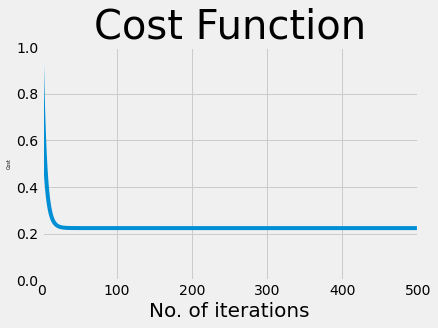

In [ ]:
# ploting cost values for each epoch
plt.title('Cost Function', size = 40)
plt.xlim([0, 500])
plt.ylim([0, 1])

plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=5)

plt.plot(error_list)
plt.show()

In [ ]:
y3_pred = np.dot(x3_test, theta)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
r2 = r2_score(y3_test, y3_pred)
print("R2 score is", r2)

R2 score is 0.734826978452688


In [ ]:
xt = sm.add_constant(x3_test)
est = sm.OLS(y3_test.astype(float), xt.astype(float))

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     312.4
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          2.49e-189
Time:                        05:44:52   Log-Likelihood:                -514.49
No. Observations:                 669   AIC:                             1043.
Df Residuals:                     662   BIC:                             1075.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.020     -0.329      0.7

In [ ]:
print("R-squared adj =",est2.rsquared_adj)

R-squared adj = 0.7366217145829472


In [ ]:
rmse = (np.sqrt(mean_squared_error(y3_train, y3_pred)))
print(rmse)

1.2952602991481892


In [ ]:
training_error = mean_squared_error(y3_train,y3_pred)
print(training_error)

1.6776992425494563


In [ ]:
testing_error = mean_squared_error(y3_test,y3_pred)
print(testing_error)

0.27693307919658694


In [ ]:
print("Addition of all absolute coefficient is", sum(theta))

Addition of all absolute coefficient is 1.2289654269871366
